# Graded Challenge 3
Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

## I. Introduction

### I.1 Project Background

This project is made to fulfill `Graded Challenge 3` on `Hacktiv8 Data Science Bootcamp program`.

On this project I will try to show the utilization of `practical statistic` in Data Science.

### I.2 Dataset Source
Dataset for this project is made available by `Mickaël Mouillé`, a crowdfunding enthusiast. You can check the dataset [here.](https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv)

**Content**\
This daset contains collection of project that listed on [Kickstarter](https://www.kickstarter.com/)

Since there is no column description anywhere in the page, so here are my personal made description for each column.\
This description will be used throughout this project.

| Column             | Description                                                                            |
| ------------------ | -------------------------------------------------------------------------------------- |
| ID                 | Unique ID of a project                                                                 |
| name               | Name of the project                                                                    |
| category           | Sub-category of the project                                                            |
| main\_category     | Main category of the project                                                           |
| currency           | Shows currency used by the creator for the crowdfunding                                |
| deadline           | Shows crowdfunding time limit for the project                                          |
| goal               | Shows the amount of money that a creator needs to complete their project               |
| launched           | Shows when the project is launched                                                     |
| pledged            | Shows total amount of money pledged by the backers for the project                     |
| state              | Shows state of the project                                                             |
| backers            | Shows number of people who  pledge money to join creators in bringing projects to life |
| country            | Shows country the project creator is in                                                |
| usd pledged        | Shows total amount of money backers give to the project creator (in usd)               |
| usd\_pledged\_real | Shows total amount of money backers give to the project creator (in usd)               |
| usd\_goal\_real    | Shows the target amount of money set for the project (in usd)                          |


According to `Mickaël` most columns is explanatory enough, except:

- usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).
- usd pledge real: conversion in US dollars of the pledged column (conversion from [Fixer.io API](https://fixer.io/)).
- usd goal real: conversion in US dollars of the goal column (conversion from [Fixer.io API](https://fixer.io/)).

**Acknowledgement**
- Data are collected from [Kickstarter Platform](https://www.kickstarter.com/)
- usd conversion (usdpledgedreal and usdgoalreal columns) were generated from [convert ks pledges to usd](https://www.kaggle.com/tonyplaysguitar/convert-ks-pledges-to-usd/) script done by [tonyplaysguitar](https://www.kaggle.com/tonyplaysguitar)

**License**\
This dataset has [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license, which mean:
- I have rights to copy and redistribute the material in any medium or format
- I have rights to remix, transform, and build upon the material

under following terms:
- I have to give `appropriate credit`, provide a link to the license, and indicate if changes were made.
- I am `not` using this `for commercial purpose`
- If any remix, transform, or build upon the material, I have to distribute it under the same license.


### I.3 Objectives

Speaking of `practical statistics` in Data Science, most common usage are the utilization of `Descriptive Statistic` and `Inferential Statistic`.

So my main objectives for this project will be:

1. Describe the dataset `Descriptive Statistic` by:
- Measure of Central Tendency
- Measure of Variance

2. Do `Inferential Statistic` through `Hypothesis Testing`

## II. Importing Libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## III. Data Loading

First, let's `import the dataset` into jupyter notebook `using pandas`.

In [2]:
# Import Dataset
df = pd.read_csv('ks-projects-201801.csv')

In [3]:
# Check Imported Data
# Shows 10 first rows
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


From dataframe information, it tells us this dataset cointains `378661 rows of entries and 15 columns`.

I think the datatype for each column is already in accordance with the column explanation above.
- `ID` and `backers` are stored as integer number.
- `currencies` related column stored as floating number.
- `Name` related column stored as object.

In [5]:
# Null value check for each column
print(df.isnull().sum())

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


From `null summary` above, there are `4 missing value on name column` and `3797 missing value on usd pledged column`.

I will check and handle it on `Data Cleaning` process in the next step.

## IV. Data Cleaning

### IV.1 Standard Missing Value identification and handling

In this part of the data cleaning process, I will `identify any standard missing value` inside the dataset and handle it.

`Standard missing value` identified as `null entries` or simply entry with `NaN` value in the column.

For this process, I will check all column that has `NaN` value.

Based on `data loading process`, We already know the column which has missing values are `name` column and `usd pledged` column.

Let's take closer look.

In [6]:
# Standard Missing Value
# Column : name

df.loc[
    (df['name'].isnull())
]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


From result above, We can see that those is almost complete entries.\
Maybe because poor data handling, the name of the project is not well documented and resulted in `null` value.

Although those project did not have name, it is still have unique ID to distinguish one another.\
So, my take on this missing values will be replacing it with `Unnamed Project`

In [7]:
# Replacing Null Value
# Column : name

df['name'].fillna('Unnamed Project', inplace=True)

Let's check other column for missing values.

In [8]:
# Standard Missing Value
# Column : usd pledged

df.loc[
    (df['usd pledged'].isnull())
].sample(45)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
43759,1222673767,Prince of Whales (Debut Album),Music,Music,USD,2016-03-09,1100.0,2016-02-25 00:45:10,890.00,undefined,0,"N,0""",NaN,890.00,1100.00
265919,422762831,Enrichment - Dark Comedy Film,Film & Video,Film & Video,GBP,2015-04-21,1300.0,2015-03-22 20:52:37,1471.00,undefined,0,"N,0""",NaN,2224.07,1965.53
354049,873666952,Irene's Five String Acoustic Fiddle,Music,Music,USD,2014-09-12,5000.0,2014-08-13 08:02:57,5050.00,undefined,0,"N,0""",NaN,5050.00,5000.00
177565,1903288996,"""Just to Be"" in a Music Video...",Music,Music,USD,2014-09-15,2000.0,2014-08-21 03:10:10,2110.00,undefined,0,"N,0""",NaN,2110.00,2000.00
304581,620841489,"Chuck Sj Hay, Time For An Album?! - Mood Swings",Music,Music,GBP,2014-09-29,800.0,2014-08-30 11:00:18,1027.00,undefined,0,"N,0""",NaN,1650.01,1285.31
287988,535296027,Building a Studio from Scratch for the public,Music,Music,USD,2015-10-07,4000.0,2015-09-12 23:40:00,0.00,undefined,0,"N,0""",NaN,0.00,4000.00
304447,620024463,Skull Island Legend of Kong,Publishing,Publishing,GBP,2016-01-08,5000.0,2015-12-09 01:28:54,25.00,undefined,0,"N,0""",NaN,36.44,7287.35
308729,642594632,The Start,Film & Video,Film & Video,USD,2015-10-02,6000.0,2015-08-03 18:05:32,0.00,undefined,0,"N,0""",NaN,0.00,6000.00
177738,1904141310,WritingsbyCosmos http://writingsbycosmos.blog...,Publishing,Publishing,USD,2015-07-19,1200.0,2015-06-22 19:11:11,0.00,undefined,0,"N,0""",NaN,0.00,1200.00
58732,1298733170,McLEOD Album Fund,Music,Music,USD,2015-06-03,6000.0,2015-05-14 21:47:19,6020.00,undefined,0,"N,0""",NaN,6020.00,6000.00


Based on result above, I found interisting pattern here.\
notice for every `usd pledged` with `null` value it is preceded with `N,0"` value in `country` column.

It is another missing value, `Unexpected missing value` to be exact.

Based on the pattern, It is likely because poor data handling causing pandas fail to seperate those entries.

My take for this case will be:
1. Replacing all `N,0"` value in `country` column into country code base on `currency` column.
2. Fill `NaN` value in `usd pledged` with the same value as in `usd pledged real`.\
Reason behind this is because both column share the same description, the only differences is the calculation method.

`Value for point number 1, will follow this conversion table:`

| Country | Currency  |
| ------- | --------- |
| AU      | AUD       |
| CA      | CAD       |
| CH      | CHF       |
| DK      | DKK       |
| GB      | GBP       |
| HK      | HKD       |
| JP      | JPY       |
| MX      | MXN       |
| NO      | NOK       |
| NZ      | NZD       |
| SE      | SEK       |
| SG      | SGD       |
| US      | USD       |
| AT      | EUR       |
| BE      | EUR       |
| DE      | EUR       |
| ES      | EUR       |
| FR      | EUR       |
| IE      | EUR       |
| IT      | EUR       |
| LU      | EUR       |
| NL      | EUR       |

Since there are several countries using `EUR`, and we don't have much information to specify which country is it,\
the `country` for `EUR` curencies will be replaced into `EU`.

In [9]:
# Replace 'N,0"' into standard missing value

df['country'].replace('N,0"', np.NaN, inplace=True)

In [10]:
# Replace standard missing value 
# fill with currency based on country the project is on

df['country'].fillna(df['currency'], inplace=True)

In [11]:
# Translate currency code into country code

df['country'].replace(
    ['AUD', 'CAD', 'CHF', 'DKK', 'GBP', 'HKD', 'JPY','MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 'EUR'], 
    ['AU', 'CA', 'CH', 'DK', 'GB', 'HK', 'JP','MX', 'NO', 'NZ', 'SE', 'SG', 'US', 'EU'], 
    inplace=True)

Now, for point number 2, let's fill `NaN` value in `usd pledged` with the same value as in `usd pledged real`

In [12]:
# fill usd pledged value

df['usd pledged'].fillna(df['usd_pledged_real'], inplace=True)

### IV.2 Non-Standard Missing Value identification and handling

In this part of the data cleaning process, I will `identify any non-standard missing value` inside the dataset and handle it.

`Non-standard missing value` identified as any entries that contains value like `'N/A', 'na', ' ', '-', etc.`\
All refers to missing values but was not in standard manners ('null', 'NA', 'NaN')

For this process, I will check all unique value within each column.

In [13]:
# Non-Standard Missing Value
# Column : category

df['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

Based on result above, each unique entry in `category` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [14]:
# Non-Standard Missing Value
# Column : main_category

df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

Based on result above, each unique entry in `main_category` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [15]:
# Non-Standard Missing Value
# Column : currency

df['currency'].unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

Based on result above, each unique entry in `currency` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [16]:
# Non-Standard Missing Value
# Column : deadline

df['deadline'].unique()

array(['2015-10-09', '2017-11-01', '2013-02-26', ..., '2009-07-26',
       '2009-07-30', '2009-12-28'], dtype=object)

Based on result above, each unique entry in `deadline` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [17]:
# Non-Standard Missing Value
# Column : goal

df['goal'].describe().round(1)

count       378661.0
mean         49080.8
std        1183391.3
min              0.0
25%           2000.0
50%           5200.0
75%          16000.0
max      100000000.0
Name: goal, dtype: float64

Based on result above, value entry in `goal` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [18]:
# Non-Standard Missing Value
# Column : launched

df['launched'].unique()

array(['2015-08-11 12:12:28', '2017-09-02 04:43:57',
       '2013-01-12 00:20:50', ..., '2010-07-01 19:40:30',
       '2016-01-13 18:13:53', '2011-07-19 09:07:47'], dtype=object)

Based on result above, each unique entry in `launched` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [19]:
# Non-Standard Missing Value
# Column : pledged

df['pledged'].describe().round(1)

count      378661.0
mean         9683.0
std         95636.0
min             0.0
25%            30.0
50%           620.0
75%          4076.0
max      20338986.3
Name: pledged, dtype: float64

Based on result above, value entry in `pledged` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [20]:
# Non-Standard Missing Value
# Column : state

df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

Based on result above, each unique entry in `state` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [21]:
# Non-Standard Missing Value
# Column : backers

df['backers'].describe().round(1)

count    378661.0
mean        105.6
std         907.2
min           0.0
25%           2.0
50%          12.0
75%          56.0
max      219382.0
Name: backers, dtype: float64

Based on result above, value entry in `backers` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [22]:
# Non-Standard Missing Value
# Column : country

df['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'EU', 'SG',
       'JP'], dtype=object)

Based on result above, each unique entry in `country` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [23]:
# Non-Standard Missing Value
# Column : usd pledged

df['usd pledged'].describe().round(1)

count      378661.0
mean         6995.7
std         78374.5
min             0.0
25%            16.7
50%           395.0
75%          3046.0
max      20338986.3
Name: usd pledged, dtype: float64

Based on result above, value entry in `usd pledged` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [24]:
# Non-Standard Missing Value
# Column : usd_pledged_real

df['usd_pledged_real'].describe().round(1)

count      378661.0
mean         9058.9
std         90973.3
min             0.0
25%            31.0
50%           624.3
75%          4050.0
max      20338986.3
Name: usd_pledged_real, dtype: float64

Based on result above, value entry in `usd_pledged_real` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

In [25]:
# Non-Standard Missing Value
# Column : usd_goal_real

df['usd_goal_real'].describe().round(1)

count       378661.0
mean         45454.4
std        1152950.1
min              0.0
25%           2000.0
50%           5500.0
75%          15500.0
max      166361390.7
Name: usd_goal_real, dtype: float64

Based on result above, value entry in `usd_goal_real` makes sense and in accordance to the column description.\
Hereby, I declared the column is free from any `Non-standard missing values`

After all the cleaning process carried out, I will save the cleaned dataframe into new dataframe.

In [26]:
# Save cleaned dataframe
df_cleaned = df

In [27]:
# Cleaning Confirmation
df_cleaned.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

I can confirm that the dataset has been cleaned and free from `missing values`\
This cleaned dataframe will be used for further process of data exploration and data analysis

## V. Data Exploration

In this data exploration process, I'll try to look into the dataset and find something interisting.

What cross my mind for the first time is, I want to know which country has most project listed in the kickstarter program.\
After that, I want to know which country has most its project backed by people.

In [28]:
# Shows 10 countries with most project listed on kickstarter
df_cleaned.groupby(['country'])[['ID']].count().sort_values(by='ID', ascending=False).head(10)

,ID
country,
US,295365
GB,34132
CA,14962
AU,7950
DE,4171
FR,2939
IT,2878
NL,2868
ES,2276


In [29]:
# Shows 10 countries with most project backed by people
df_cleaned.groupby(['country'])[['backers']].sum().sort_values(by='backers', ascending=False).head(10)

,backers
country,
US,33089856
GB,2859587
CA,1302563
AU,642816
DE,410147
FR,350214
NL,228251
SE,169344
ES,164227


From result above, We can tell that `US` is the `country with most project listed` in the kickstarter.com and also `most project backed by people`.

Seeing `US` as the country with most project listed and most project backed, I decide to focus in `US` even more.

So, I will query current dataset to only listed project from `US`. Also, I consider to use only these column in the dataframe.

| Column             | Description                                                                            |
| ------------------ | -------------------------------------------------------------------------------------- |
| ID                 | Unique ID of a project                                                                 |
| name               | Name of the project                                                                    |
| main\_category     | Main category of the project                                                           |
| usd\_goal\_real    | Shows the target amount of money set for the project (in usd)                          |
| usd\_pledged\_real | Shows total amount of money backers give to the project creator (in usd)               |
| backers            | Shows number of people who  pledge money to join creators in bringing projects to life |
| state              | Shows state of the project                                                             |

In [30]:
# US Sample dataframe
df_US = df_cleaned.loc[
    (df_cleaned['country']=='US')
][['ID','name','main_category','usd_goal_real','usd_pledged_real','backers','state']]

In [31]:
# Check the dataframe
df_US.sample(10)

,ID,name,main_category,usd_goal_real,usd_pledged_real,backers,state
120139,1610199525,The Story-Eaters Traveling Puppet Show,Art,5000.0,5679.0,78,successful
102882,1522965125,Set up,Film & Video,20000.0,245.0,2,failed
82316,1418511058,Studio for Professional Graffiti Artist,Art,12000.0,0.0,0,failed
108747,1552842819,Land of Hope and Dreams,Photography,7000.0,321.0,11,failed
50417,1256792051,"""Klean Boobs"" Breast Cancer Awareness Soaps",Crafts,2000.0,2070.0,68,successful
377812,995815600,Music Transcription to Germany!,Music,1000.0,0.0,0,failed
97388,1494607737,Schoolyard Slugger Android/iOS Game,Games,12500.0,36.0,3,failed
31457,1159946234,"""Bring Me The Head Of Lance Henriksen"" - Life ...",Film & Video,20000.0,594.0,8,failed
125139,163531523,Missy: A Feature Film,Film & Video,25000.0,2480.0,28,failed
310261,650312321,"""Freed Men: Oppressed by the Oppressed"" a docu...",Film & Video,20000.0,576.0,8,failed


From `US` dataset, let's see how many project are in each `main_category` and how many project in each `state`.

To make more compelling analysis, I will use graph in the process.

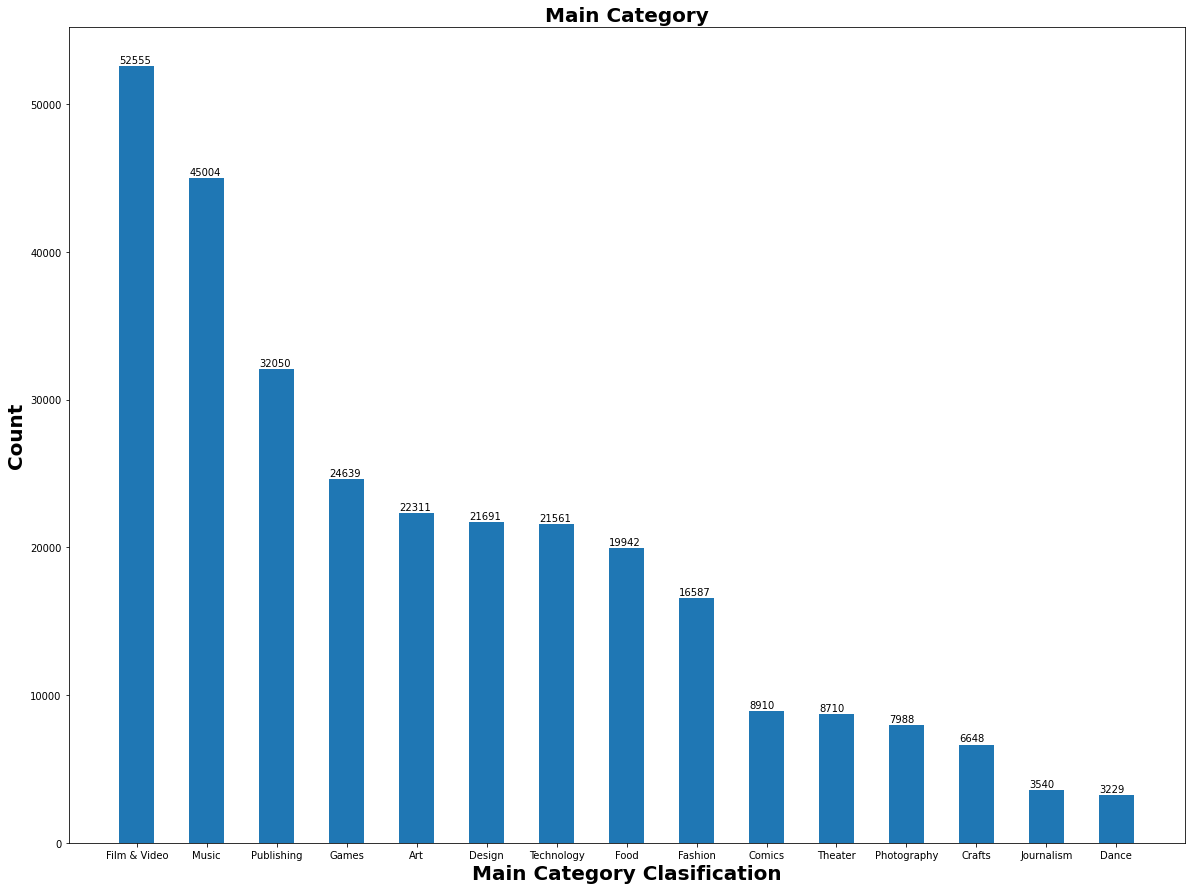

In [32]:
# Project count in each main-category

# Set figure size
fig = plt.figure(figsize=(20, 15))
barWidth= 0.5

# Set axis value
dictionary1 = df_US['main_category'].value_counts().to_dict()
x = dictionary1.keys()
y = dictionary1.values()

# Plotting the axis
plot1 = plt.bar(x, y, width=barWidth)

# Labeling
plt.title('Main Category', fontweight = 'bold', fontsize = '20')
plt.xlabel('Main Category Clasification', fontweight = 'bold', fontsize = '20')
plt.ylabel('Count', fontweight = 'bold', fontsize = '20')

# Attach a text label above each bar displaying its height
for bar in plot1:
    plt.annotate(bar.get_height(),xy=(bar.get_x(), bar.get_height()+200,), fontsize=10)

From above graph, We can see that  most project are `Film & Video` related project.  

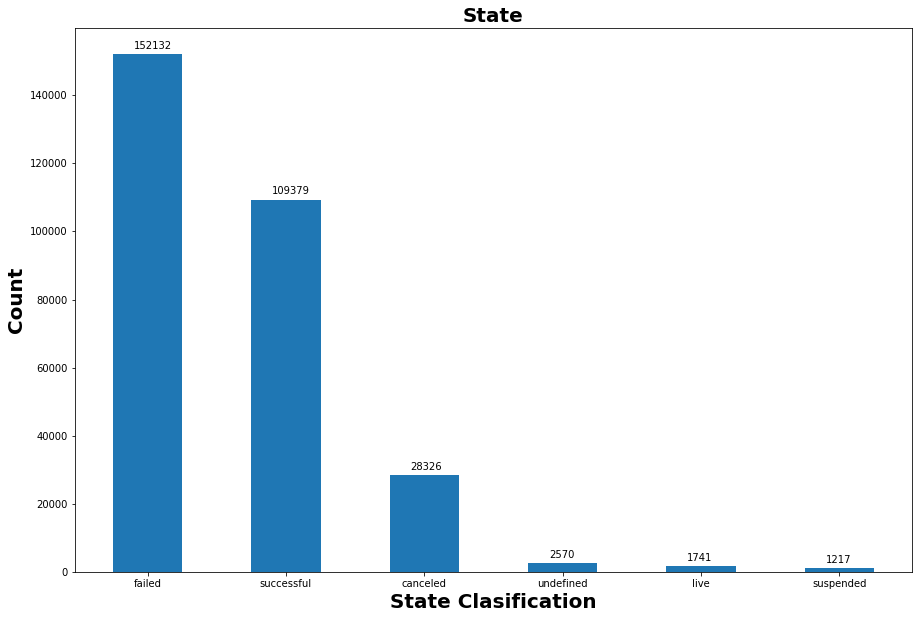

In [33]:
# Project count in each state

# Set figure size
fig = plt.figure(figsize=(15, 10))
barWidth= 0.5

# Set axis value
dictionary2 = df_US['state'].value_counts().to_dict()
x = dictionary2.keys()
y = dictionary2.values()

# Plotting the axis
plot2 = plt.bar(x, y, width=barWidth)

# Labeling
plt.title('State', fontweight = 'bold', fontsize = '20')
plt.xlabel('State Clasification', fontweight = 'bold', fontsize = '20')
plt.ylabel('Count', fontweight = 'bold', fontsize = '20')

# Attach a text label above each bar displaying its height
for bar in plot2:
    plt.annotate(bar.get_height(),xy=(bar.get_x() + 0.15, bar.get_height()+1500,), fontsize=10)

To my surprise, although `US` listed most project in `kickstarter.com`, the amount of `failed project is higher than successful project`.

### V.1 Measure of Central Tendency (Distribution of the Dataset)

In this part of process, I will find out how the data is distributed inside the dataset.
This will give us general understanding of `dataset shape` and `typical value` in the dataset.

`Descriptive Statistic` will be used to accomplish this task.\
I will find `Measure of Central Tendency` and `Measure of Variance` of the dataset.\
After that, I will plot it in the graph.

In `Descriptive Statistic`, I will focus on column with `numeric` datatype.\
So, my focus will be on `usd_goal_real, usd_pledged_real, backers` column

In [34]:
# Finding Measure of Central Tendency
# Column : usd_goal_real

print('Measure of Central Tendency - usd_goal_real ')
print()
print(f'Min : ', df_US['usd_goal_real'].min())
print(f'Mean : ', df_US['usd_goal_real'].mean().round(2))
print(f'Median : ', df_US['usd_goal_real'].median())
print(f'Mode : ', df_US['usd_goal_real'].mode())
print(f'Max : ',df_US['usd_goal_real'].max())

Measure of Central Tendency - usd_goal_real 

Min :  0.01
Mean :  43677.76
Median :  5000.0
Mode :  0    5000.0
Name: usd_goal_real, dtype: float64
Max :  100000000.0


Based on result above, We can see that `usd_goal_real` column has `almost identical` value of `mean, median, and mode`.\
With `mean` value slightly less than `median and mode` value, the distribution will be slightly `skewed left`.

Notice there is great gape between `min` value and `max` value. This can indicate that this distribution is `not normally distributed`.

In [35]:
# Finding Measure of Central Tendency
# Column : usd_pledged_real

print('Measure of Central Tendency - usd_pledged_real')
print()
print(f'Min : ', df_US['usd_pledged_real'].min())
print(f'Mean : ', df_US['usd_pledged_real'].mean().round(2))
print(f'Median : ', df_US['usd_pledged_real'].median())
print(f'Mode : ', df_US['usd_pledged_real'].mode())
print(f'Max : ',df_US['usd_pledged_real'].max())

Measure of Central Tendency - usd_pledged_real

Min :  0.0
Mean :  9612.26
Median :  725.0
Mode :  0    0.0
Name: usd_pledged_real, dtype: float64
Max :  20338986.27


Based on result above, We can see that `usd_pledged_real` column has `different` value of `mean, median, and mode`.\
With `mean` far away to the right of `median and mode`, the distribution will very `right skewed`

Notice there is great gape between `min` value and `max` value. This can indicate that this distribution is `not normally distributed`.

In [36]:
# Finding Measure of Central Tendency
# Column : backers

print('Measure of Central Tendency - backers')
print()
print(f'Min : ', df_US['backers'].min())
print(f'Mean : ', df_US['backers'].mean().round(2))
print(f'Median : ', df_US['backers'].median())
print(f'Mode : ', df_US['backers'].mode())
print(f'Max : ',df_US['backers'].max())

Measure of Central Tendency - backers

Min :  0
Mean :  112.03
Median :  13.0
Mode :  0    0
Name: backers, dtype: int64
Max :  219382


Based on result above, We can see that `backers` column has `different` value of `mean, median, and mode`.\
With `mean` far away to the right of `median and mode`, the distribution will very `right skewed`

Notice there is great gape between `min` value and `max` value. This can indicate that this distribution is `not normally distributed`.

### V.2 Measure of Variance (Distribution of the Dataset cont.)

For measure of variance, I will calculate the `Range, Quartile, Variance, and Standard Deviation` of each column in the dataset.

In [37]:
# Finding Measure of Variance
# Column : usd_goal_real

print('Measure of Variance - usd_goal_real ')
print()

print(f'Range : ', df_US['usd_goal_real'].max() - df_US['usd_goal_real'].min())
print(f'1st Quartile : ', df_US['usd_goal_real'].quantile(0.25))
print(f'3rd Quartile : ', df_US['usd_goal_real'].quantile(0.75))
print(f'Variance : ', df_US['usd_goal_real'].var().round(2))
print(f'Std. Deviation : ', df_US['usd_goal_real'].std().round(2))

Measure of Variance - usd_goal_real 

Range :  99999999.99
1st Quartile :  2000.0
3rd Quartile :  15000.0
Variance :  1217131876694.45
Std. Deviation :  1103237.0


Based on result above, We can see that `usd_goal_real` column has 
- Extreme `Range` value, this is caused by extreme difference bewtween min value and max value
- Extreme `Variance and Std. Deviation` value, this will lead to high spread of the data inside the column
- This may indicate lots of `Outlier` in the dataset

In [38]:
# Finding Measure of Variance
# Column : usd_pledged_real

print('Measure of Variance - usd_pledged_real')
print()

print(f'Range : ', df_US['usd_pledged_real'].max() - df_US['usd_pledged_real'].min())
print(f'1st Quartile : ', df_US['usd_pledged_real'].quantile(0.25))
print(f'3rd Quartile : ', df_US['usd_pledged_real'].quantile(0.75))
print(f'Variance : ', df_US['usd_pledged_real'].var().round(2))
print(f'Std. Deviation : ', df_US['usd_pledged_real'].std().round(2))

Measure of Variance - usd_pledged_real

Range :  20338986.27
1st Quartile :  41.0
3rd Quartile :  4368.0
Variance :  9801091726.55
Std. Deviation :  99000.46


Based on result above, We can see that `usd_pledged_real` column has 
- Extreme `Range` value, this is caused by extreme difference bewtween min value and max value
- Extreme `Variance and Std. Deviation` value, this will lead to high spread of the data inside the column
- This may indicate lots of `Outlier` in the dataset

In [39]:
# Finding Measure of Variance
# Column : backers

print('Measure of Variance - backers')
print()
print(f'Range : ', df_US['backers'].max() - df_US['backers'].min())
print(f'1st Quartile : ', df_US['backers'].quantile(0.25))
print(f'3rd Quartile : ', df_US['backers'].quantile(0.75))
print(f'Variance : ', df_US['backers'].var().round(2))
print(f'Std. Deviation : ', df_US['backers'].std().round(2))

Measure of Variance - backers

Range :  219382
1st Quartile :  2.0
3rd Quartile :  59.0
Variance :  962760.93
Std. Deviation :  981.2


Based on result above, We can see that `backers` column has 
- Extreme `Range` value, this is caused by extreme difference bewtween min value and max value
- Extreme `Variance and Std. Deviation` value, this will lead to high spread of the data inside the column
- This may indicate lots of `Outlier` in the dataset

### Distribution Plots
Now let's see those distribution in graph. 
But, due to those data is highly spread and has extreme range, I will log formatted those dataset first.

In [40]:
# Log transforma all dataset

log_goal = np.log(df_US['usd_goal_real'])
log_pledged = np.log(df_US['usd_pledged_real'])
log_backers = np.log(df_US['backers'])

C:\Users\alam3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


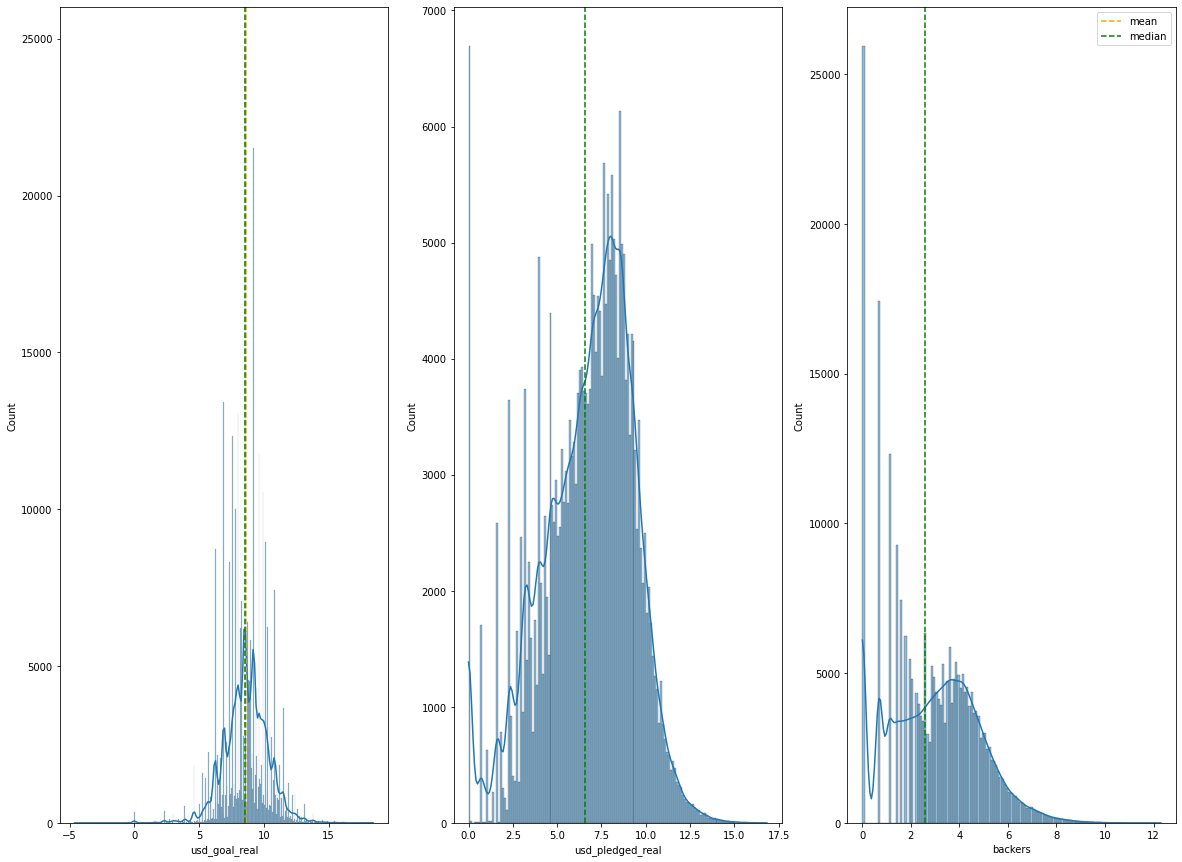

In [41]:
# Plotting
fig, ax = plt.subplots(ncols=3, figsize=(20,15))

sns.histplot(log_goal, kde=True, ax=ax[0])
ax[0].axvline(log_goal.mean(), linestyle='dashed', label='mean', color='orange')
ax[0].axvline(log_goal.median(), linestyle='dashed', label='median', color='green')

sns.histplot(log_pledged, kde=True, ax=ax[1])
ax[1].axvline(log_pledged.mean(), linestyle='dashed', label='mean', color='red')
ax[1].axvline(log_pledged.median(), linestyle='dashed', label='median', color='green')

sns.histplot(log_backers, kde=True, ax=ax[2])
ax[2].axvline(log_backers.mean(), linestyle='dashed', label='mean', color='orange')
ax[2].axvline(log_backers.median(), linestyle='dashed', label='median', color='green')

plt.legend()
plt.show()

After doing log transformation to the dataset, We can see that the distribution of data in `usd_goal_real` column is getting closer to `bellshape curve`.

Let's see the log transformed `Measure of Central Tendency.`

In [42]:
# Measure of Central Tendency
# Column : log_goal

print('Measure of Central Tendency - log_goal')
print()
print(f'Mean : ', log_goal.mean().round(2))
print(f'Median : ', log_goal.median())
print(f'Mode : ', log_goal.mode())

Measure of Central Tendency - log_goal

Mean :  8.64
Median :  8.517193191416238
Mode :  0    8.517193
Name: usd_goal_real, dtype: float64


In [43]:
# Measure of Central Tendency
# Column : log_pledged

print('Measure of Central Tendency - log_pledged')
print()
print(f'Mean : ', log_pledged.mean().round(2))
print(f'Median : ', log_pledged.median())
print(f'Mode : ', log_pledged.mode())

Measure of Central Tendency - log_pledged

Mean :  -inf
Median :  6.586171654854675
Mode :  0   -inf
Name: usd_pledged_real, dtype: float64


In [44]:
# Measure of Central Tendency
# Column : log_backers

print('Measure of Central Tendency - log_backers')
print()
print(f'Mean : ', log_backers.mean().round(2))
print(f'Median : ', log_backers.median())
print(f'Mode : ', log_backers.mode())

Measure of Central Tendency - log_backers

Mean :  -inf
Median :  2.5649493574615367
Mode :  0   -inf
Name: backers, dtype: float64


It's confirmed, after log transformation, the only column that able to get close to `normal distribution` is `usd_goal_real` column.\
We can see that the value of of `Mean, Median, and Mode` are almost equal.\
With `sample size above 30` and `Measure of Central Tendency` tends to shows the same value, I can assume `usd_goal_real` column is `normmaly distributed.`

### V.3 Hypothesis Testing

From previous process, We know that only `log transformed usd_goal_real` column that is `normally distributed`.\
So, for `Hypothesis Testing`, I will try to make inference from this column.

Before make any inference, let's see the log transformed column once again.

In [45]:
# Log transformed `usd_goal_real`

df_log = df_US[['ID', 'name', 'main_category', 'usd_goal_real', 'state']]
df_log.insert(4, 'usd_goal_log', log_goal)

df_log.head(10)

,ID,name,main_category,usd_goal_real,usd_goal_log,state
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,30000.0,10.308953,failed
2,1000004038,Where is Hank?,Film & Video,45000.0,10.714418,failed
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,8.517193,failed
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,9.878170,canceled
5,1000014025,Monarch Espresso Bar,Food,50000.0,10.819778,successful
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,1000.0,6.907755,successful
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Food,25000.0,10.126631,failed
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Design,125000.0,11.736069,canceled
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,65000.0,11.082143,canceled
11,100005484,Lisa Lim New CD!,Music,12500.0,9.433484,successful


Now let's find something interisting in our dataset.

In [46]:
df_log.groupby('main_category')['usd_goal_log'].mean().sort_values(ascending=False)

main_category
Technology      9.726707
Design          9.187512
Food            9.007434
Games           8.931700
Film & Video    8.924145
Fashion         8.564142
Journalism      8.478189
Publishing      8.344984
Theater         8.257609
Music           8.245188
Photography     8.195528
Dance           8.162865
Comics          8.095929
Art             7.919961
Crafts          7.691644
Name: usd_goal_log, dtype: float64

Based on result above, mean values for some `main_category` are looks similar. 

For reminder, `usd_goal` has description like this:
| Column             | Description                                                                            |
| ------------------ | -------------------------------------------------------------------------------------- |
| usd\_goal\_real    | Shows the target amount of money set for the project (in usd)                          |

Most similar mean values is between `Games` and `Film & Video` categories.

Let's run `Hypothesis Testing` to determine wether this value is significantly different or not.

For comparing mean value between categories, I will utilize `T-test with 2 sample.`

In [47]:
# Sample Preparation
games = df_log[df_log['main_category']=='Games']
film = df_log[df_log['main_category']=='Film & Video']

In [48]:
games['usd_goal_log'].mean()

8.931700236375603

In [49]:
film['usd_goal_log'].mean()

8.924144789445938

### Hypothesis Notation

> - Null Hypothesis : Mean value of `Games` category is relatively the same as Mean value of `Film & Videos` category
> - Alt. Hypothesis : Mean value of `Games` category is significantly different with Mean value of `Film & Videos` category

### Mathematical Notation

> - **H0 : μ_Games = μ_Film & Videos**
> - **H1 : μ_Games != μ_Film & Videos**

### Level of Significance

for this test, I determine the `level of significance` will be `5%`.

> **ɑ = 0.05**

### T-Test 2 Sample 2 Tailed

In [50]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(games['usd_goal_log'], film['usd_goal_log'])

# ttest_ind is 2-tailed, so we dont need to divide by 2
print('Probability value : ', p_val)
print('t-statistics : ', t_stat)

Probability value :  0.5637829147837504
t-statistics :  0.5772342376951554


In [51]:
# Compare P_value with Level of Significance

p_val <= 0.05

False

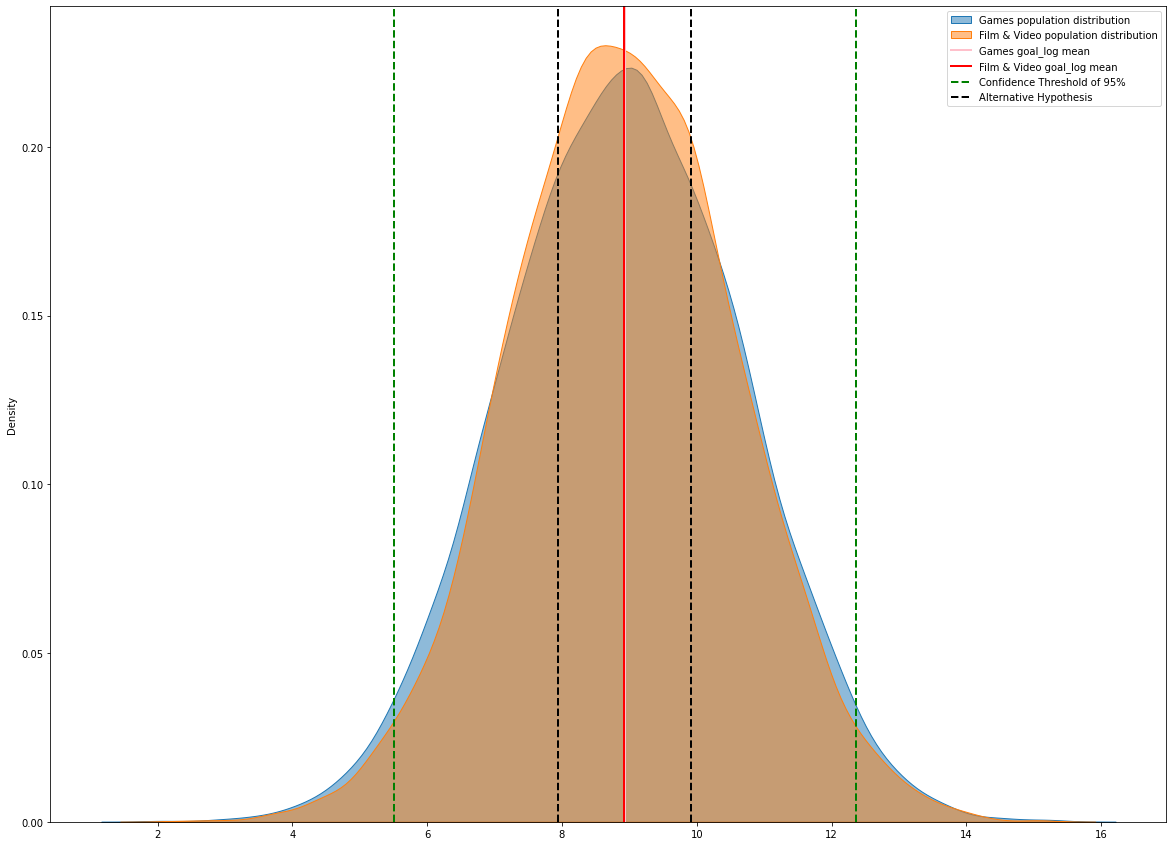

In [52]:
# Simulation
games_pop = np.random.normal(games['usd_goal_log'].mean(), games['usd_goal_log'].std(),10000)
film_pop = np.random.normal(film['usd_goal_log'].mean(), film['usd_goal_log'].std(),10000)

# confidence interval
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, games['usd_goal_log'].mean(), games['usd_goal_log'].std())

plt.figure(figsize=(20,15))
sns.kdeplot(games_pop, label='Games population distribution', fill='blue', alpha=0.5)
sns.kdeplot(film_pop, label='Film & Video population distribution', fill='orange' , alpha=0.5)

# mean
plt.axvline(games['usd_goal_log'].mean(), color='pink', linewidth=2, label='Games goal_log mean')
plt.axvline(film['usd_goal_log'].mean(), color='red',  linewidth=2, label='Film & Video goal_log mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='Confidence Threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(games_pop.mean() + t_stat * games_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(film_pop.mean() - t_stat * film_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

### Result Interpretation

From P_value comparisson with Level of Significance, We can see that `P_value is greater than ɑ.`\
From the simulation graph, We can see that the `'Alternative Hypothesis Line' falls inside the 'Confidence Threshold of 95%'`

So, I can conclude that `there is not enough evidence to reject the null hypothesis.`\
Which mean, Mean value of `Games` category is relatively the same as Mean value of `Film & Videos` category

## VI. Conclusion

### VI.1 Descriptive Statistic Conclusion

Desciptive Statistic consists of `measure of central tendency` and `measure of variance.`

Here are the summary of `Descriptive Statistic` for each column.

In [53]:
# Column : usd_goal_real

print('Measure of Central Tendency - usd_goal_real ')
print()
print(f'Min : ', df_US['usd_goal_real'].min())
print(f'Mean : ', df_US['usd_goal_real'].mean().round(2))
print(f'Median : ', df_US['usd_goal_real'].median())
print(f'Mode : ', df_US['usd_goal_real'].mode())
print(f'Max : ',df_US['usd_goal_real'].max())

print()

print('Measure of Variance - usd_goal_real ')
print()
print(f'Range : ', df_US['usd_goal_real'].max() - df_US['usd_goal_real'].min())
print(f'1st Quartile : ', df_US['usd_goal_real'].quantile(0.25))
print(f'3rd Quartile : ', df_US['usd_goal_real'].quantile(0.75))
print(f'Variance : ', df_US['usd_goal_real'].var().round(2))
print(f'Std. Deviation : ', df_US['usd_goal_real'].std().round(2))

Measure of Central Tendency - usd_goal_real 

Min :  0.01
Mean :  43677.76
Median :  5000.0
Mode :  0    5000.0
Name: usd_goal_real, dtype: float64
Max :  100000000.0

Measure of Variance - usd_goal_real 

Range :  99999999.99
1st Quartile :  2000.0
3rd Quartile :  15000.0
Variance :  1217131876694.45
Std. Deviation :  1103237.0


In [54]:
# Column : usd_pledged_real

print('Measure of Central Tendency - usd_pledged_real')
print()
print(f'Min : ', df_US['usd_pledged_real'].min())
print(f'Mean : ', df_US['usd_pledged_real'].mean().round(2))
print(f'Median : ', df_US['usd_pledged_real'].median())
print(f'Mode : ', df_US['usd_pledged_real'].mode())
print(f'Max : ',df_US['usd_pledged_real'].max())

print()

print('Measure of Variance - usd_pledged_real')
print()
print(f'Range : ', df_US['usd_pledged_real'].max() - df_US['usd_pledged_real'].min())
print(f'1st Quartile : ', df_US['usd_pledged_real'].quantile(0.25))
print(f'3rd Quartile : ', df_US['usd_pledged_real'].quantile(0.75))
print(f'Variance : ', df_US['usd_pledged_real'].var().round(2))
print(f'Std. Deviation : ', df_US['usd_pledged_real'].std().round(2))

Measure of Central Tendency - usd_pledged_real

Min :  0.0
Mean :  9612.26
Median :  725.0
Mode :  0    0.0
Name: usd_pledged_real, dtype: float64
Max :  20338986.27

Measure of Variance - usd_pledged_real

Range :  20338986.27
1st Quartile :  41.0
3rd Quartile :  4368.0
Variance :  9801091726.55
Std. Deviation :  99000.46


In [55]:
# Column : backers

print('Measure of Central Tendency - backers')
print()
print(f'Min : ', df_US['backers'].min())
print(f'Mean : ', df_US['backers'].mean().round(2))
print(f'Median : ', df_US['backers'].median())
print(f'Mode : ', df_US['backers'].mode())
print(f'Max : ',df_US['backers'].max())

print()

print('Measure of Variance - backers')
print()
print(f'Range : ', df_US['backers'].max() - df_US['backers'].min())
print(f'1st Quartile : ', df_US['backers'].quantile(0.25))
print(f'3rd Quartile : ', df_US['backers'].quantile(0.75))
print(f'Variance : ', df_US['backers'].var().round(2))
print(f'Std. Deviation : ', df_US['backers'].std().round(2))

Measure of Central Tendency - backers

Min :  0
Mean :  112.03
Median :  13.0
Mode :  0    0
Name: backers, dtype: int64
Max :  219382

Measure of Variance - backers

Range :  219382
1st Quartile :  2.0
3rd Quartile :  59.0
Variance :  962760.93
Std. Deviation :  981.2


From `Descriptive Statistic` result above, it tells us:

- `Mean` value is differ far away from `Median and Mode` value.
- This result in `Skewed Distribution`
- `Range` value is too extreme for each column
- `Std. Deviation` is also too extreme compared to the `measure of central tendency`

Log format is done to `reduce distribution skewness`, and hope to get more `normally distributed data.`

After log formatting each column, only `usd_goal_real` column is getting closer to normally distributed data.

Here are the result after log formatting.

In [56]:
# Measure of Central Tendency
# Column : log_goal

print('Measure of Central Tendency - log_goal')
print()
print(f'Mean : ', log_goal.mean().round(2))
print(f'Median : ', log_goal.median())
print(f'Mode : ', log_goal.mode())

Measure of Central Tendency - log_goal

Mean :  8.64
Median :  8.517193191416238
Mode :  0    8.517193
Name: usd_goal_real, dtype: float64


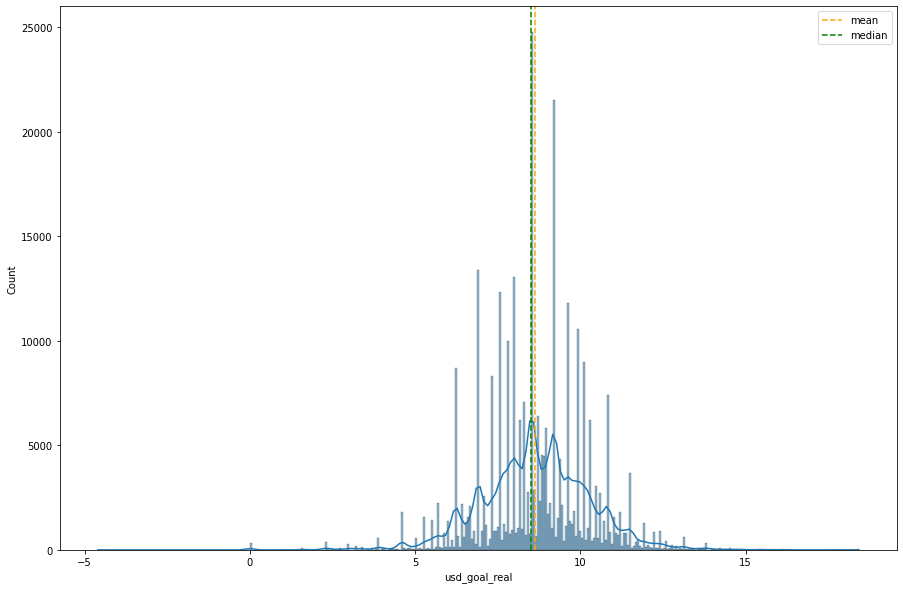

In [57]:
# Graph plot
plt.figure(figsize=(15, 10))

sns.histplot(log_goal, kde=True)
plt.axvline(log_goal.mean(), linestyle='dashed', label='mean', color='orange')
plt.axvline(log_goal.median(), linestyle='dashed', label='median', color='green')

plt.legend()
plt.show()

### VI.2 Inferential Statistic Conclusion

From previous process, only `log transformed usd_goal_real` column that is `normally distributed`.\
Statistical inference will be carried out from this column.

In [58]:
# Grouping the dataset by main category
# Show the mean value for each main category

df_log.groupby('main_category')['usd_goal_log'].mean().sort_values(ascending=False)

main_category
Technology      9.726707
Design          9.187512
Food            9.007434
Games           8.931700
Film & Video    8.924145
Fashion         8.564142
Journalism      8.478189
Publishing      8.344984
Theater         8.257609
Music           8.245188
Photography     8.195528
Dance           8.162865
Comics          8.095929
Art             7.919961
Crafts          7.691644
Name: usd_goal_log, dtype: float64

Based on result above, mean values for some `main_category` are looks similar.

We will run `Hypothesis Testing` to determine wether mean values between `Games` and `Film & Video` categories is significantly different or not.

In [59]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(games['usd_goal_log'], film['usd_goal_log'])

# ttest_ind is 2-tailed, so we dont need to divide by 2
print('Probability value : ', p_val)
print('t-statistics : ', t_stat)

Probability value :  0.5637829147837504
t-statistics :  0.5772342376951554


In [60]:
# Compare P_value with Level of Significance

p_val <= 0.05

False

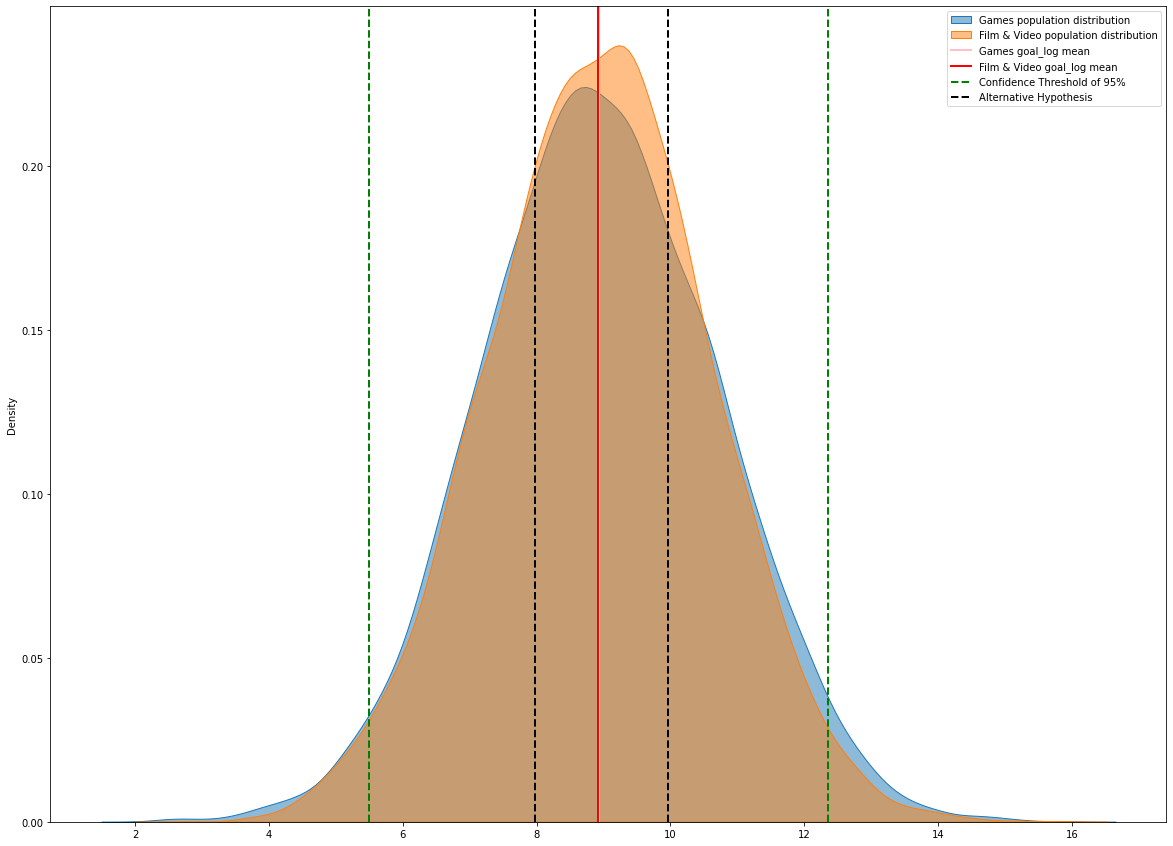

In [61]:
# Simulation
games_pop = np.random.normal(games['usd_goal_log'].mean(), games['usd_goal_log'].std(),10000)
film_pop = np.random.normal(film['usd_goal_log'].mean(), film['usd_goal_log'].std(),10000)

# confidence interval
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, games['usd_goal_log'].mean(), games['usd_goal_log'].std())

plt.figure(figsize=(20,15))
sns.kdeplot(games_pop, label='Games population distribution', fill='blue', alpha=0.5)
sns.kdeplot(film_pop, label='Film & Video population distribution', fill='orange' , alpha=0.5)

# mean
plt.axvline(games['usd_goal_log'].mean(), color='pink', linewidth=2, label='Games goal_log mean')
plt.axvline(film['usd_goal_log'].mean(), color='red',  linewidth=2, label='Film & Video goal_log mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='Confidence Threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(games_pop.mean() + t_stat * games_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(film_pop.mean() - t_stat * film_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Result Interpretation

From P_value comparisson with Level of Significance, We can see that `P_value is greater than ɑ.`\
From the simulation graph, We can see that the `'Alternative Hypothesis Line' falls inside the 'Confidence Threshold of 95%'`

So, I can conclude that `there is not enough evidence to reject the null hypothesis.`\
Which mean, Mean value of `Games` category is relatively the same as Mean value of `Film & Videos` category